In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style("whitegrid")

In [14]:
# Upload the data
bitcoin = pd.read_csv('/home/khrystyna/UDataSchool/Signal_processing/Практика/Dataset/bitcoin.csv')
bitcoin.tail()

,Unnamed: 0,close,date,high,low,market_cap,open,volume
1863,1863,105.21,"May 02, 2013",125.60,92.28,"1,292,190,000",116.38,-
1864,1864,116.99,"May 01, 2013",139.89,107.72,"1,542,820,000",139.00,-
1865,1865,139.00,"Apr 30, 2013",146.93,134.05,"1,597,780,000",144.00,-
1866,1866,144.54,"Apr 29, 2013",147.49,134.00,"1,491,160,000",134.44,-
1867,1867,134.21,"Apr 28, 2013",135.98,132.10,"1,500,520,000",135.30,-


In [18]:
bitcoin['Indx'] = np.arange(bitcoin.shape[0]-1, -1, -1)
bitcoin.set_index('Indx', inplace=True)
bitcoin.head()

,Unnamed: 0,close,date,high,low,market_cap,open,volume
Indx,,,,,,,,
1867,0,7624.92,"Jun 08, 2018",7698.19,7558.40,"131,271,000,000",7685.14,"4,227,580,000"
1866,1,7678.24,"Jun 07, 2018",7741.27,7650.82,"130,671,000,000",7650.82,"4,485,800,000"
1865,2,7653.98,"Jun 06, 2018",7680.43,7502.01,"130,233,000,000",7625.97,"4,692,260,000"
1864,3,7633.76,"Jun 05, 2018",7643.23,7397.00,"128,081,000,000",7500.90,"4,961,740,000"
1863,4,7514.47,"Jun 04, 2018",7753.82,7474.04,"131,847,000,000",7722.53,"4,993,170,000"


The column "open" was chosen to analyse.

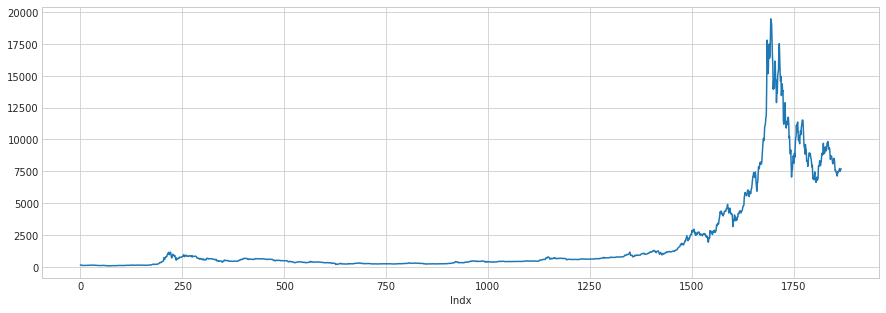

In [19]:
# Vizualisation .reindex(index=bitcoin_open.index[::-1])
fig_size = [15, 5]
_ = bitcoin['open'].plot(figsize = fig_size)

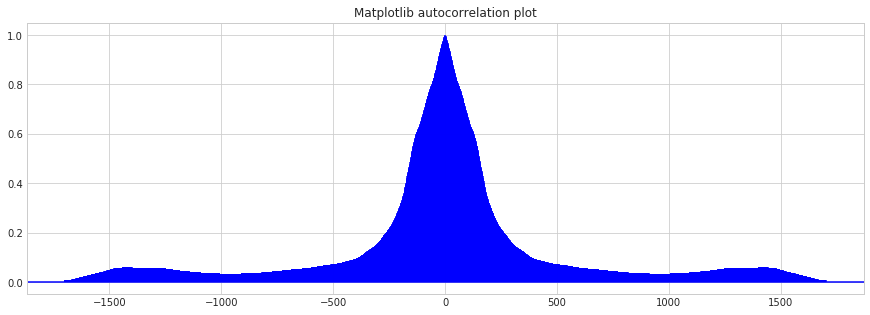

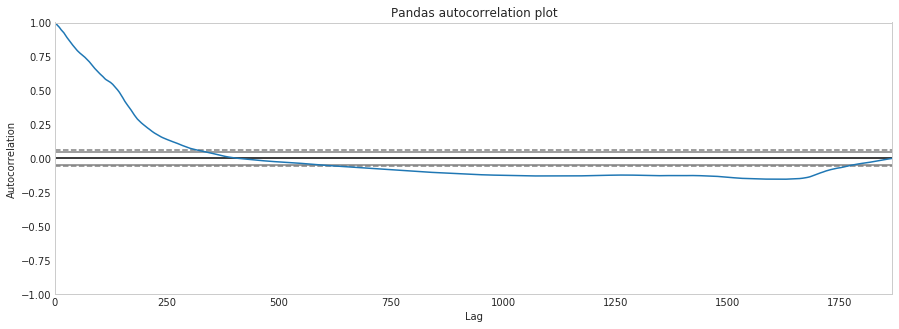

In [20]:
# Autocorrelation function with matplotlib
plt.figure(figsize = fig_size)
_ = plt.acorr(bitcoin['open'],maxlags=1700, color = 'b')
_ = plt.title('Matplotlib autocorrelation plot')

# Autocorrelation function with pandas
from pandas.plotting import autocorrelation_plot

plt.figure(figsize=fig_size)
_ = autocorrelation_plot(bitcoin['open'])
_ = plt.title('Pandas autocorrelation plot')

In [21]:
# Manualy calculated autocorrelation
def my_autocorr(data, lag):
    autocorr = 0
    m = data.mean()
    denominator = 0
    for x in data:
        denominator += (x - m) ** 2
    numerator = 0
    for i in range(lag+1, data.shape[0]):
        numerator += (data[i] - m) * (data[i - lag] - m)
    return numerator / denominator

my_autocorr_list = []
for lag in range(1, bitcoin['open'].shape[0] - 1):
    my_autocorr_list.append(my_autocorr(bitcoin['open'], lag))

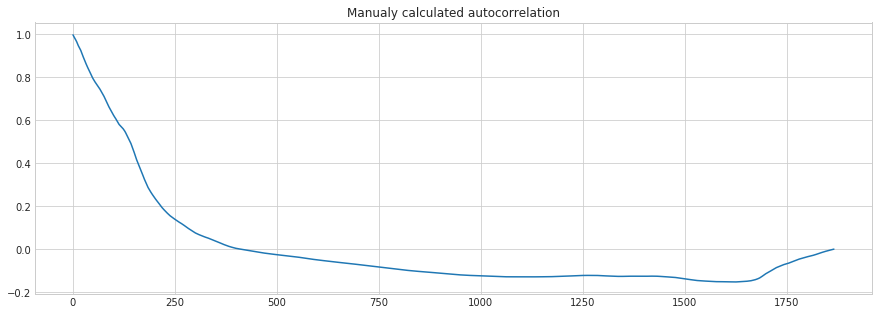

In [22]:
plt.figure(figsize=fig_size)
_ = plt.plot(range(1, bitcoin['open'].shape[0] - 1), my_autocorr_list)
_ = plt.title('Manualy calculated autocorrelation')

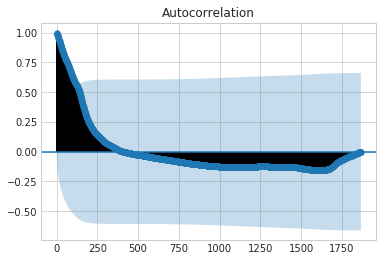

In [23]:
# Autocorrelation function with matplotlib
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(bitcoin['open'])
plt.show()

It can be concluded that series is non-stationary. Let's select some part of series to further analysis.

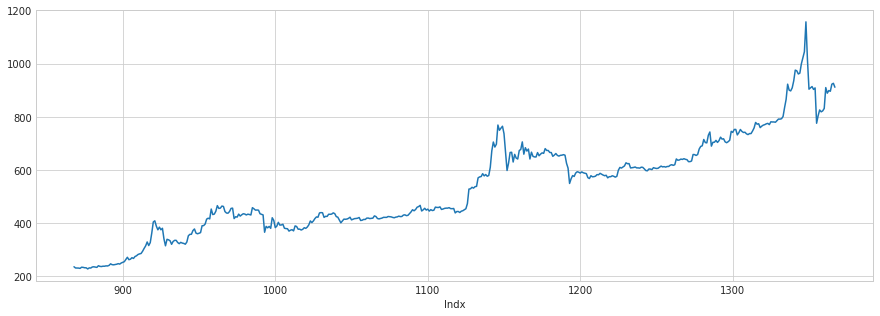

In [32]:
# choose the part of series
part_data = bitcoin.iloc[500:1000]['open']
_ = part_data.plot(figsize = fig_size)

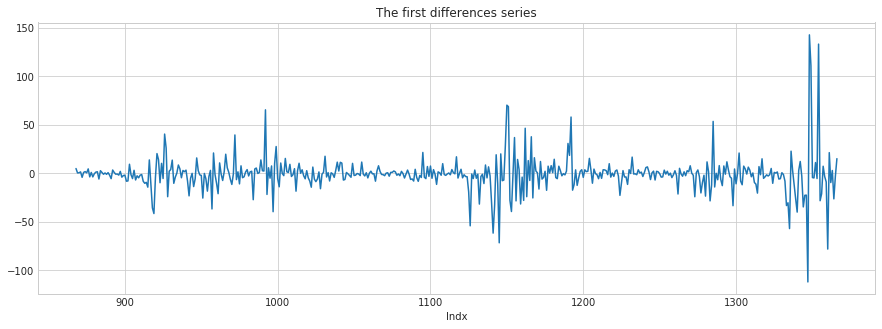

In [37]:
# Use the first differences to remove non-stationary
_ = part_data.diff(periods=1).plot(figsize=fig_size)
_ = plt.title('The first differences series')

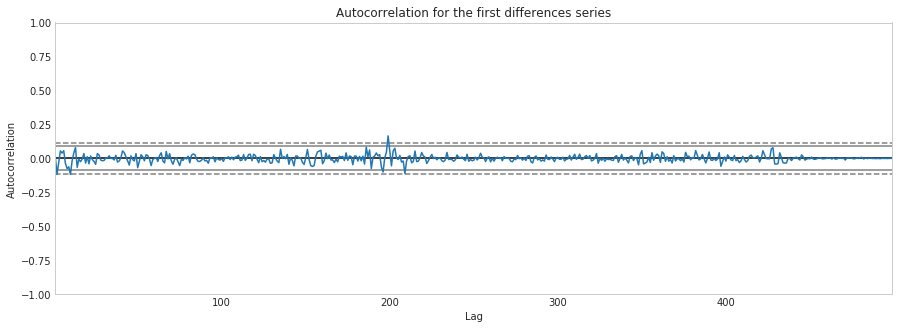

In [39]:
# Plot the autocorrelation function for the series above.
plt.figure(figsize=fig_size)
_ = autocorrelation_plot(part_data.diff().dropna())
_ = plt.title('Autocorrelation for the first differences series')

It can be seen that almost all values of the autocorrelation function lies in the confidence interval, so the series does not have a period. Let's plot the partial autocorrelation function also.

In [45]:
part_data.values

array([ 910.68,  925.5 ,  922.21,  895.55,  898.17,  888.34,  909.37,
        830.95,  821.78,  818.14,  825.14,  803.74,  775.18,  908.12,
        902.44,  913.24,  908.17,  903.49, 1014.24, 1156.73, 1044.4 ,
       1021.6 ,  998.62,  963.66,  960.63,  972.53,  975.13,  934.83,
        908.35,  896.9 ,  899.65,  922.18,  864.89,  834.18,  800.64,
        792.25,  790.69,  791.01,  785.17,  778.96,  780.07,  780.  ,
        780.65,  770.04,  774.75,  773.02,  769.94,  768.08,  764.21,
        758.72,  773.39,  771.64,  778.25,  757.54,  746.05,  736.28,
        736.33,  732.48,  735.44,  741.51,  740.44,  744.62,  751.74,
        739.64,  731.26,  751.88,  751.83,  740.71,  744.88,  711.17,
        705.79,  702.  ,  705.2 ,  716.75,  715.55,  722.84,  709.83,
        703.09,  710.74,  703.81,  703.52,  689.12,  742.35,  730.07,
        701.34,  702.64,  714.12,  690.29,  688.  ,  678.21,  657.68,
        654.  ,  657.16,  657.62,  633.14,  630.83,  630.66,  638.13,
        639.41,  641

/home/khrystyna/.local/lib/python3.5/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


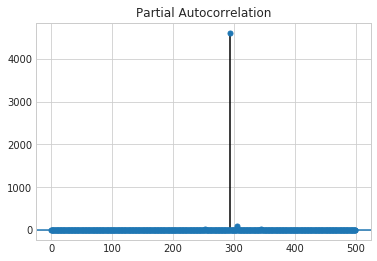

In [41]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(part_data)
plt.show()

In [46]:
# Check if the series has period and return its value
import math 

def autocorrelation_analysis(initial_series):
    is_period = False
    #val_period = 0
    my_autocorr_list = []
    periods_list = []
    interval = 1.96 / math.sqrt(initial_series.shape[0] - 1)
    for lag in range(1, initial_series.shape[0] - 1):
        my_autocorr_list.append(my_autocorr(initial_series, lag))
        if ((my_autocorr(initial_series, lag) > interval) | (my_autocorr(initial_series, lag) < -interval)):
            periods_list.append(my_autocorr(initial_series, lag))
    
    if (periods_list == []):
        is_period = False
    else:
        is_period = True
    return is_period, periods_list

autocorrelation_analysis(part_data.values)

(True,
 [0.9786511355794655,
  0.9659047207539214,
  0.9549225003075982,
  0.9441332593638889,
  0.9329287693311599,
  0.9208612374626622,
  0.909955627078224,
  0.8995622665715299,
  0.8899732446661538,
  0.8807305336714645,
  0.8732125900580249,
  0.8664731243072319,
  0.8562771087392254,
  0.8453483873491602,
  0.834769851207942,
  0.8242894685647837,
  0.8142145850418149,
  0.8015144268444766,
  0.7850730991516348,
  0.7715290939486703,
  0.7583169906560138,
  0.7460021532817591,
  0.734241110084652,
  0.72261355959099,
  0.7109816416138048,
  0.6996206722762475,
  0.6887548743165962,
  0.6782016503180547,
  0.6679970881191571,
  0.6578912456652863,
  0.6473306304379455,
  0.6380768233865337,
  0.6295224558181147,
  0.6215351820815479,
  0.6138452407059394,
  0.6062935823802024,
  0.5986401060182892,
  0.5908712469283864,
  0.5835811171417591,
  0.576365708153224,
  0.5691868311354455,
  0.5614340476415222,
  0.5535315772950383,
  0.5454013044976526,
  0.5374719280116402,
  0.53022

In [ ]:
1. Нормалізувати дані
2. Відрізати частинку

